# Problem 5



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

%matplotlib inline

# Data preprocessing


Three preprocessing steps on the Titanic training dataset: 1) remove the 'ticket' feature entirely (because it has corrupted entries), 2) remove the 'cabin' feature entirely (because it has several missing entries), 3) fill other missing entries of a column with the mode of that column (which is reasonable to do because these columns only have a few missing entries). Problems of missing and corrupted data are ubiquitous in several applications of machine learning, and these data cleaning steps is frequently necessary to ensure reliable performance.

In [2]:
fill_mode = lambda col: col.fillna(col.mode()[0])

data = pd.read_csv('titanic_training.csv') 
data = data.drop(columns = ['ticket', 'cabin'])
data = data.apply(fill_mode, axis=0)
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0.0,3.0,male,22.0,0.0,0.0,8.0500,S
1,0.0,1.0,male,22.0,0.0,0.0,135.6333,C
2,0.0,2.0,male,23.0,0.0,0.0,15.0458,C
3,0.0,2.0,male,42.0,0.0,0.0,13.0000,S
4,0.0,3.0,male,20.0,0.0,0.0,9.8458,S


In [3]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

# One-hot encoding

Note that the categorical features are 'sex', 'embarked' and 'pclass'. Note that even though 'pclass' takes integral values {1,2,3}, we consider it as categorical as the numbers do not have any cardinal meaning. For example, 3 is not actually "further" from 1 than 2.

Perform the standard 80/20 train-test split.

In [4]:
sex = pd.get_dummies(X.sex, prefix='sex')
embarked = pd.get_dummies(X.embarked, prefix='embarked')
pclass = pd.get_dummies(X.pclass, prefix='pclass')

In [5]:
X = X.join(sex).join(pclass).join(embarked)
X = X.drop(columns = ['sex','embarked','pclass'])
X.head()

,age,sibsp,parch,fare,sex_female,sex_male,pclass_1.0,pclass_2.0,pclass_3.0,embarked_C,embarked_Q,embarked_S
0,22.0,0.0,0.0,8.0500,0,1,0,0,1,0,0,1
1,22.0,0.0,0.0,135.6333,0,1,1,0,0,1,0,0
2,23.0,0.0,0.0,15.0458,0,1,0,1,0,1,0,0
3,42.0,0.0,0.0,13.0000,0,1,0,1,0,0,0,1
4,20.0,0.0,0.0,9.8458,0,1,0,0,1,0,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Depth-3 decision trees

Training a depth-3 decision tree using both the gini criterion and the information gain (entropy) criterion. Evaluate their test accuracies.

In [7]:
# gini criterion
clf_gini = DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
clf_gini.fit(X_train, y_train)
clf_gini.score(X_test, y_test)

0.82

In [8]:
# information gain (entropy) criterion
clf_info = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
clf_info.fit(X_train, y_train)
clf_info.score(X_test, y_test)

0.8

Observe that the decision trees do not differ in their test accuracies.

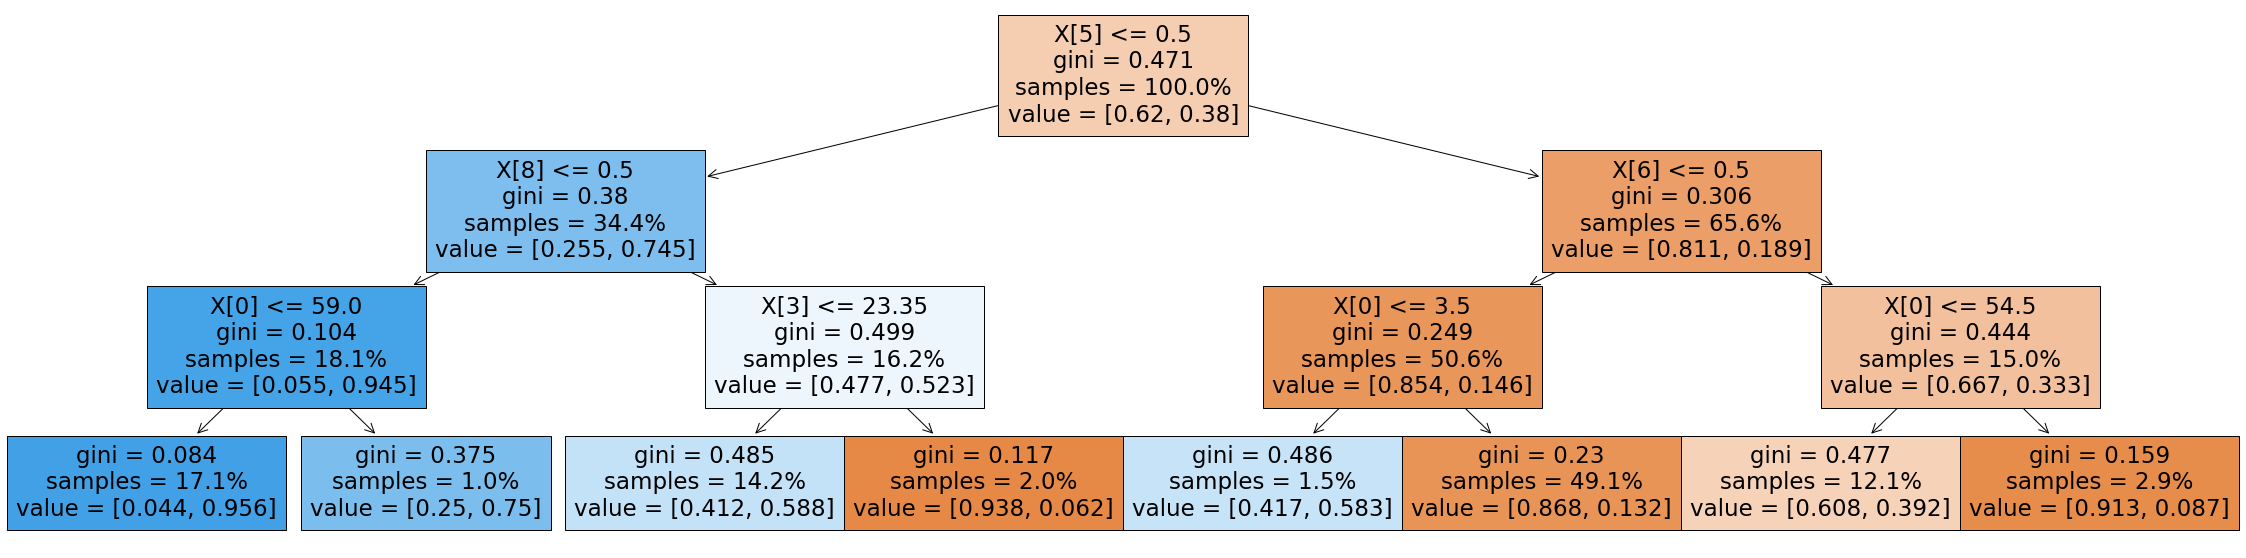

In [9]:
#visualize gini decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 10))
plot_tree(clf_gini, filled=True, proportion=True)
plt.show()

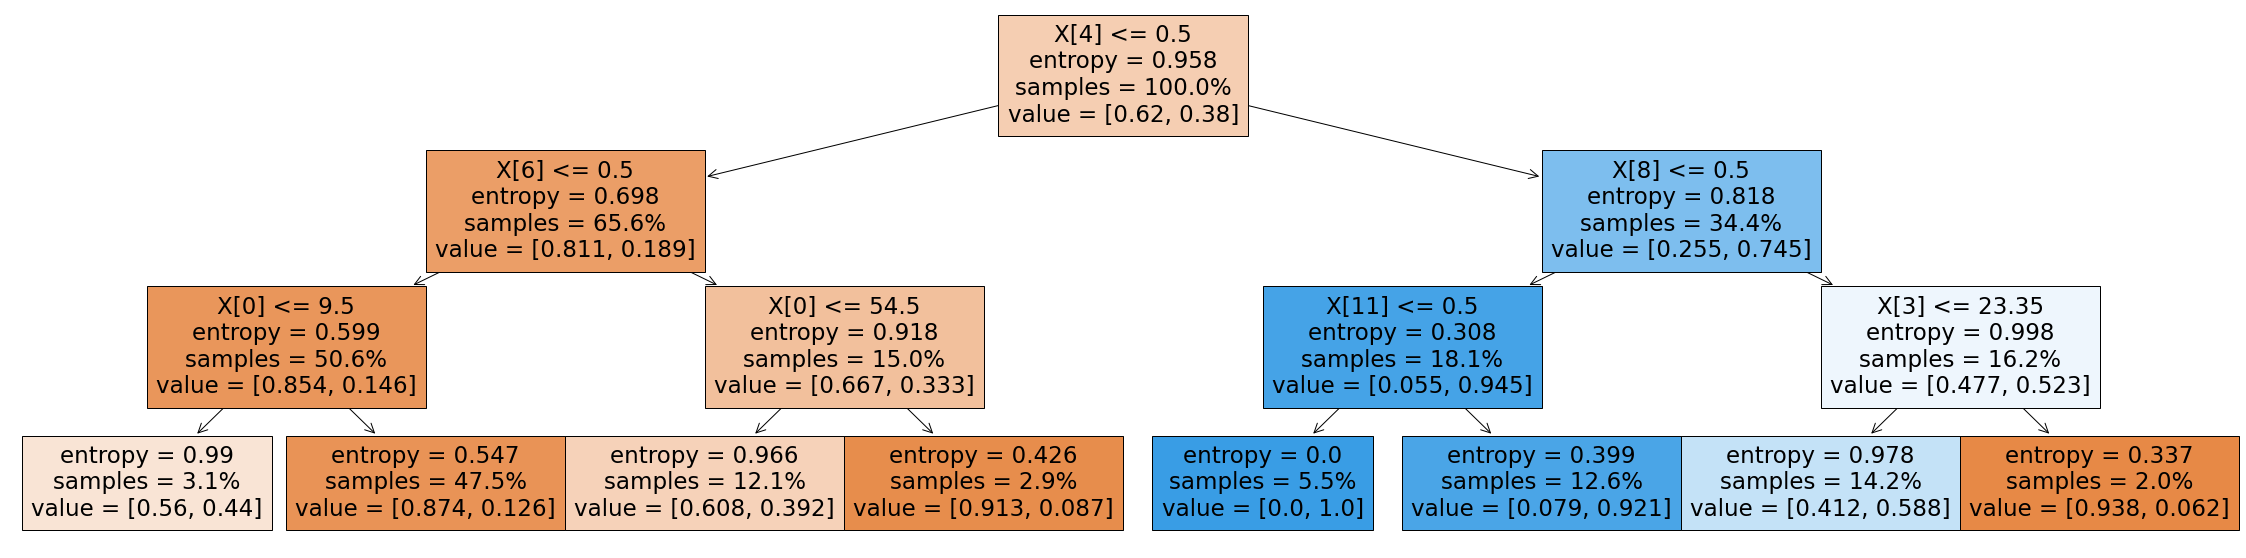

In [10]:
#visualize info gain decision tree
plt.figure(figsize=(40, 10))
plot_tree(clf_info, filled=True, proportion=True)
plt.show()

Some subtle differencesFor example, if the first two steps in the path taken are "right-left", the gini decision tree thresholds X(0) but the info gain decision tree thresholds X(11).

This should tell you that decision trees are not extremely stable for this problem, and so we should likely not put too much stock in concrete interpretations of the splits.

# Depth-4 decision tree

Training a depth-4 decision tree with default parameters. Evaluate its test accuracy.

In [11]:
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.81

Observe that the depth-4 decision tree has similar test accuracy to both the depth-3 decision trees. As we said above, getting very concrete interpretations can be a bit loaded here because things are a bit unstable, but clearly, a depth 3 decision tree is less complex and likely preferable to a depth 4 tree with the same test accuracy.

We will now visualize the decision tree.

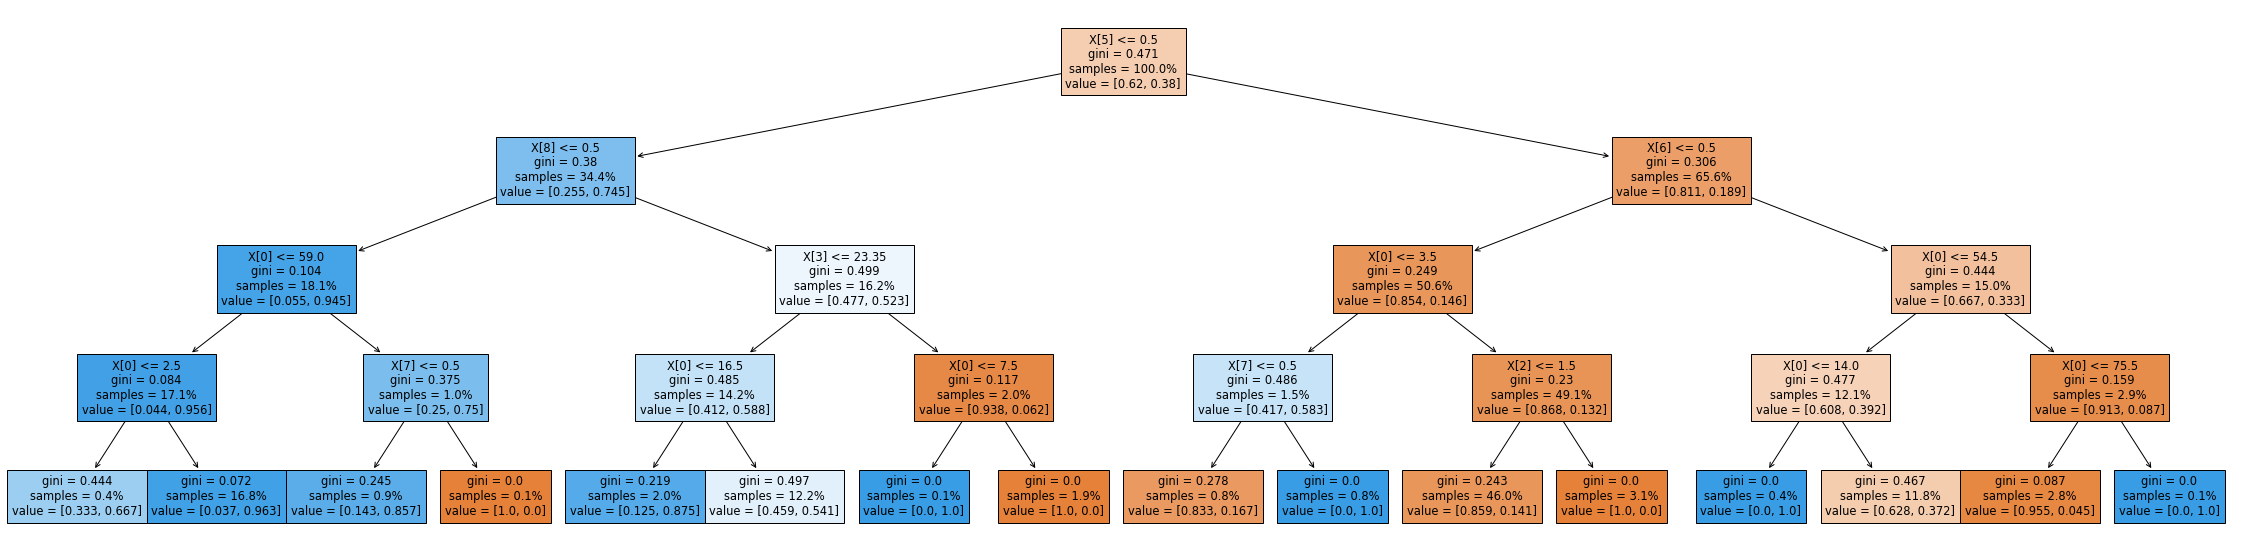

In [12]:
plt.figure(figsize=(40, 10))
plot_tree(clf, filled=True, proportion=True)
plt.show()

# Random forests:

Train and evaluate a random forest classifier, starting with the number of trees being set to 10.

In [13]:
clf = RandomForestClassifier(n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8

Observe that this random forest classifier achieves accuracy very similar to the accuracy of the depth-3 and depth-4 decision trees.

We will now plot the test accuracy of a random forest classifier as a function of the number of trees used, and see whether overfittting happens.

In [14]:
score = []
for i in range(1,100,1):
    clf = RandomForestClassifier(n_estimators=i, random_state=0)
    clf.fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))

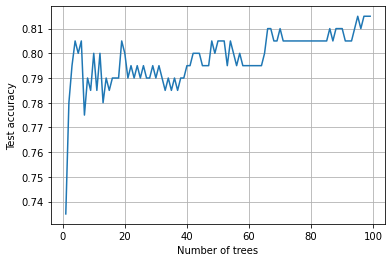

In [15]:
trees = np.arange(1,100,1)
plt.plot(trees, score)
plt.xlabel('Number of trees')
plt.ylabel('Test accuracy')
plt.grid()
plt.show()

No overfitting happening here; like you saw in lecture, such an aggregation model is able to boost accuracy in a nice monotonic fashion! The flip-side is that you are losing interpretability as you move right on this plot.